###**Pratical Task RC2**

In this task, we will see the simulation of using the baysien network on real dataset and a real problem in the medical field, also doing inferences & dealing with conditional probabilistic tables.

####Done by:
Hadjer Eddalia

In [ ]:
pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
 

In [ ]:
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
from pgmpy.estimators import MaximumLikelihoodEstimator
import pandas as pd

##Loading dataset

In [ ]:
df= pd.read_csv('/content/dataset_risque_cardiaque.csv')

##Understanding the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    500 non-null    object
 1   Sexe                   500 non-null    object
 2   Tabagisme              500 non-null    object
 3   Activite_physique      500 non-null    object
 4   Antecedents_familiaux  500 non-null    object
 5   Stress_chronique       500 non-null    object
 6   Hypertension           500 non-null    object
 7   Cholesterol_eleve      500 non-null    object
 8   Diabete                500 non-null    object
 9   Risque_cardiaque       500 non-null    object
dtypes: object(10)
memory usage: 39.2+ KB


In [ ]:
df.describe()

,Age,Sexe,Tabagisme,Activite_physique,Antecedents_familiaux,Stress_chronique,Hypertension,Cholesterol_eleve,Diabete,Risque_cardiaque
count,500,500,500,500,500,500,500,500,500,500
unique,3,2,2,2,2,2,2,2,2,2
top,Jeune,Homme,Non,Oui,Non,Non,Oui,Non,Non,Non
freq,207,262,353,296,355,253,287,260,426,280


In [ ]:
df.columns

Index(['Age', 'Sexe', 'Tabagisme', 'Activite_physique',
       'Antecedents_familiaux', 'Stress_chronique', 'Hypertension',
       'Cholesterol_eleve', 'Diabete', 'Risque_cardiaque'],
      dtype='object')

In [ ]:
df.shape

(500, 10)

##Preprocessing of dataset

In [ ]:
df.isnull().sum()

,0
Age,0
Sexe,0
Tabagisme,0
Activite_physique,0
Antecedents_familiaux,0
Stress_chronique,0
Hypertension,0
Cholesterol_eleve,0
Diabete,0
Risque_cardiaque,0


In [ ]:
df.duplicated().sum()

np.int64(242)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(258, 10)

In [ ]:
binary_cols = ['Tabagisme', 'Activite_physique', 'Antecedents_familiaux',
               'Stress_chronique', 'Hypertension', 'Cholesterol_eleve',
               'Diabete', 'Risque_cardiaque']

df[binary_cols] = df[binary_cols].replace({'Oui': 1, 'Non': 0}).infer_objects(copy=False)

<ipython-input-13-50cf39aebf6a>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'Oui': 1, 'Non': 0}).infer_objects(copy=False)


In [ ]:
df['Sexe'] = df['Sexe'].replace({'Homme': 1, 'Femme': 0}).infer_objects(copy=False)

<ipython-input-14-59796e726df2>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sexe'] = df['Sexe'].replace({'Homme': 1, 'Femme': 0}).infer_objects(copy=False)


In [ ]:
df.head()

,Age,Sexe,Tabagisme,Activite_physique,Antecedents_familiaux,Stress_chronique,Hypertension,Cholesterol_eleve,Diabete,Risque_cardiaque
0,Jeune,0,1,1,1,0,1,0,0,1
1,Adulte,0,0,1,1,0,1,1,0,1
2,Moyen,1,0,1,0,0,0,1,0,0
3,Moyen,0,0,1,1,0,1,0,0,0
4,Jeune,0,0,1,1,1,1,0,0,1


##Exploratory Data Analysis

In this step we are doing some analysis to understand more our data and know relation between our different feature that can leads for a good dependecies in our BN.

##Univariate Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Since all our features are categorical we used the barplot for the representation & visualisation, we understand each feature seperably before diving into relation between two variables.

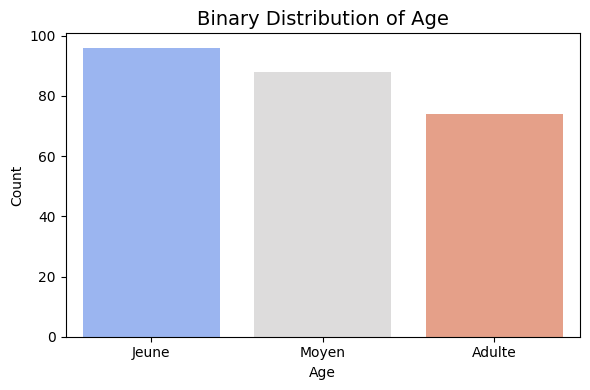

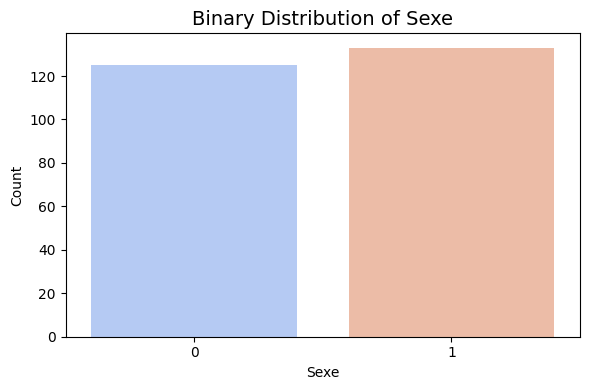

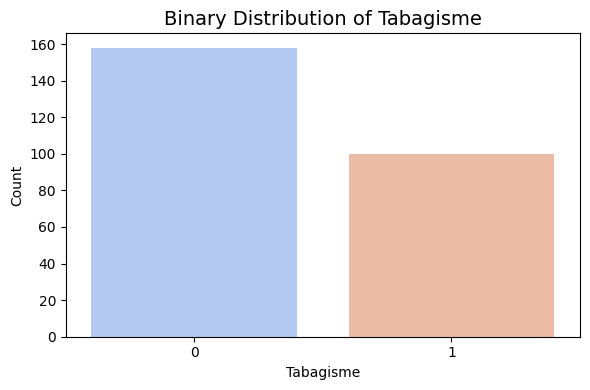

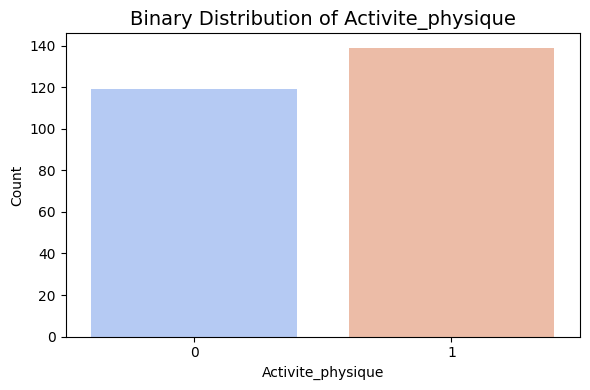

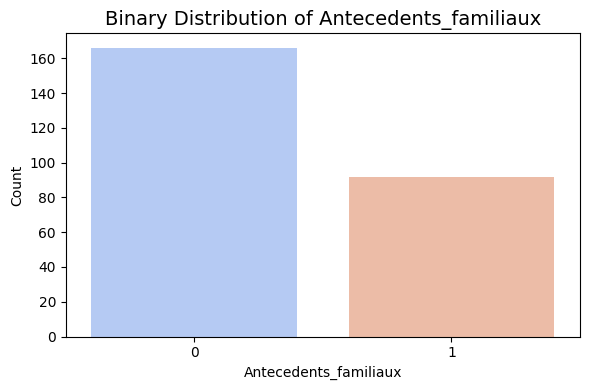

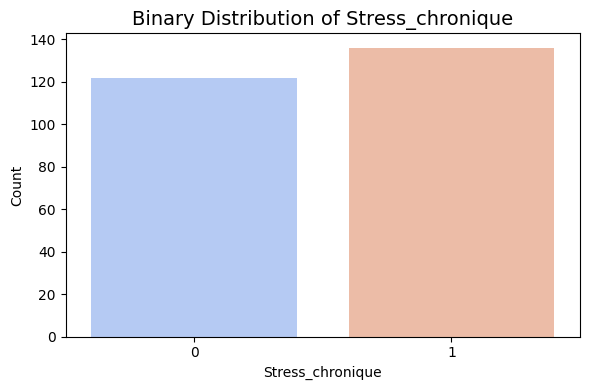

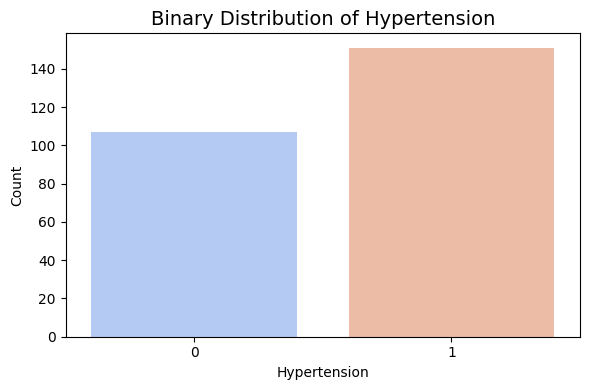

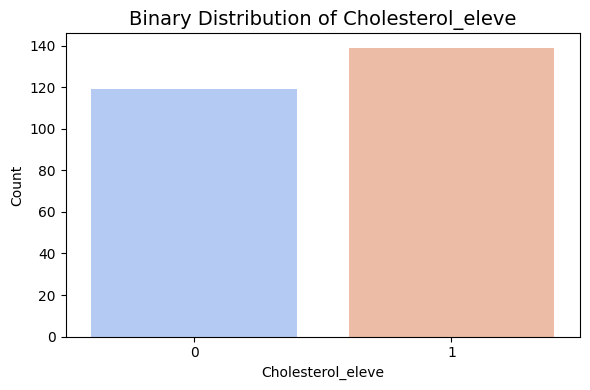

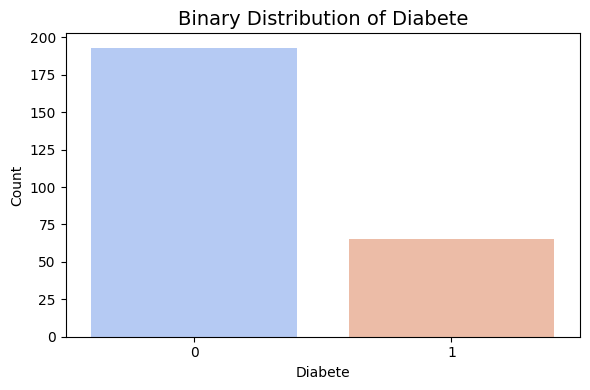

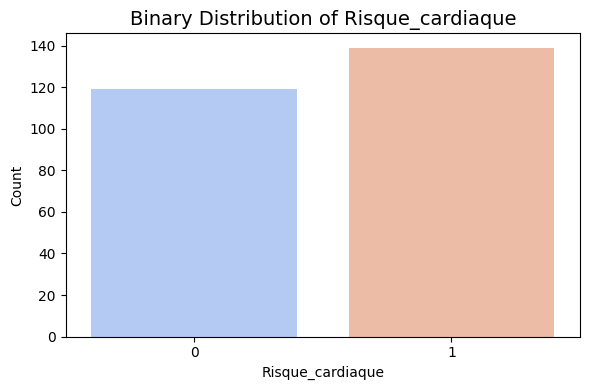

In [ ]:
for col in df.columns:
    counts = df[col].value_counts()

    temp_df = pd.DataFrame({col: counts.index, 'count': counts.values})

    plt.figure(figsize=(6, 4))
    sns.barplot(data=temp_df, x=col, y='count', hue=col, palette='coolwarm', legend=False)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

##Bivariate Analysis

In the bivariate analysis, we check the relation between two variables, since all the variables are categorical so we will use KHI2.

In [ ]:
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
import numpy as np

First we check with the target variable "Risque_Cardiaque"


📊 [Chi²] Age vs Risque_cardiaque


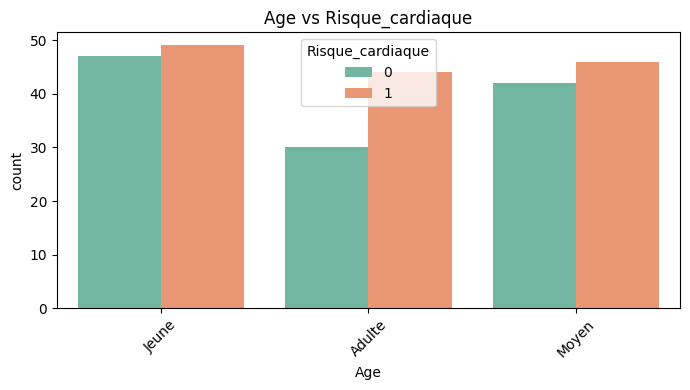

✅ Test du Khi² - p-value = 0.5143
❌ Aucune association significative.

📊 [Chi²] Sexe vs Risque_cardiaque


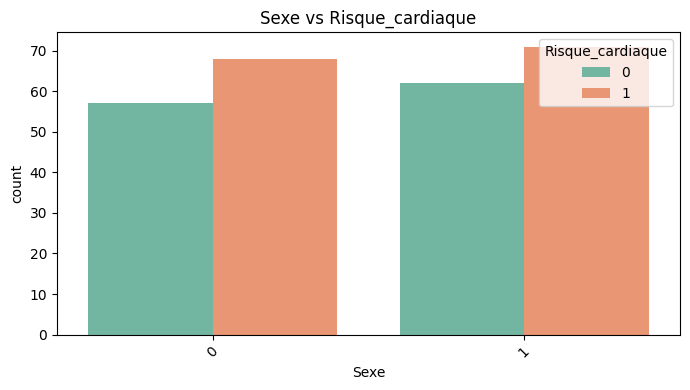

✅ Test du Khi² - p-value = 0.9691
❌ Aucune association significative.

📊 [Chi²] Tabagisme vs Risque_cardiaque


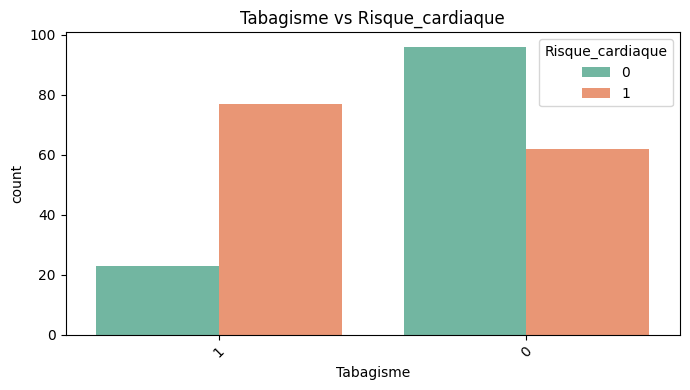

✅ Test du Khi² - p-value = 0.0000
➡️ Association significative.

📊 [Chi²] Activite_physique vs Risque_cardiaque


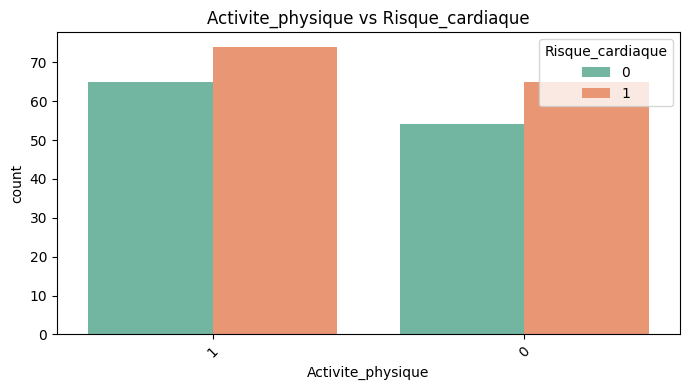

✅ Test du Khi² - p-value = 0.9226
❌ Aucune association significative.

📊 [Chi²] Antecedents_familiaux vs Risque_cardiaque


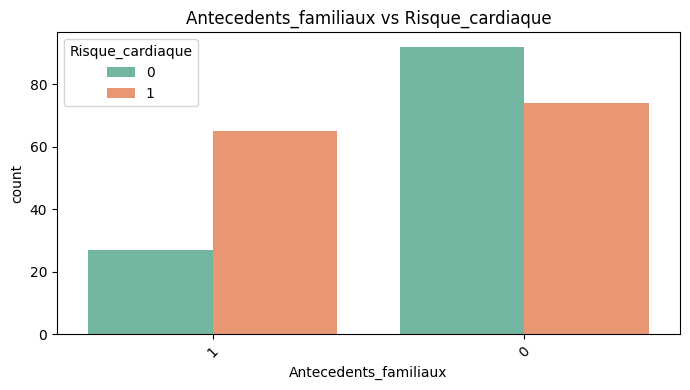

✅ Test du Khi² - p-value = 0.0001
➡️ Association significative.

📊 [Chi²] Stress_chronique vs Risque_cardiaque


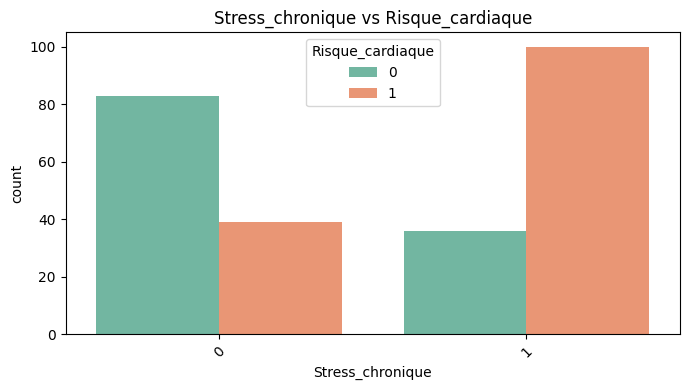

✅ Test du Khi² - p-value = 0.0000
➡️ Association significative.

📊 [Chi²] Hypertension vs Risque_cardiaque


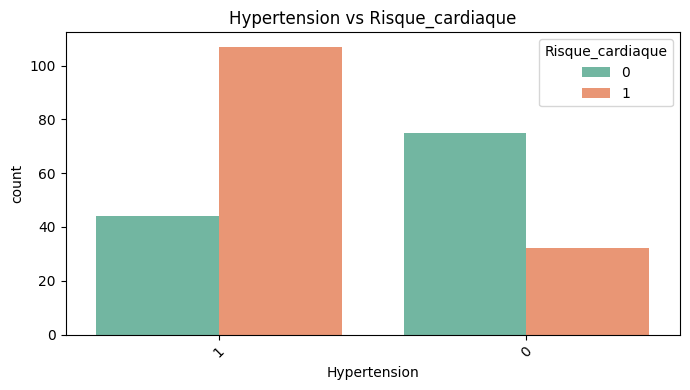

✅ Test du Khi² - p-value = 0.0000
➡️ Association significative.

📊 [Chi²] Cholesterol_eleve vs Risque_cardiaque


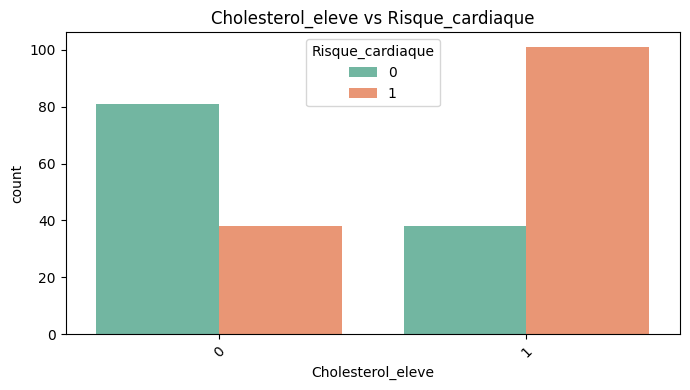

✅ Test du Khi² - p-value = 0.0000
➡️ Association significative.

📊 [Chi²] Diabete vs Risque_cardiaque


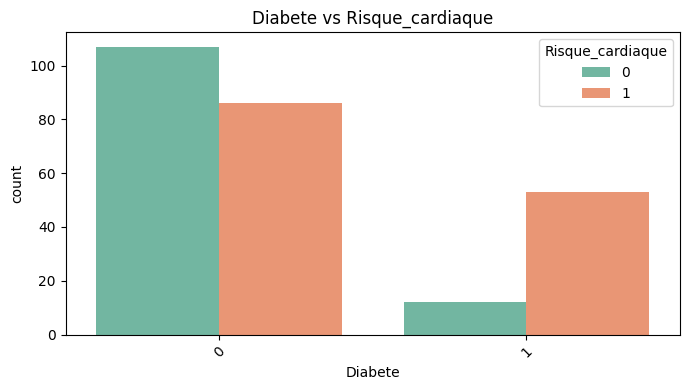

✅ Test du Khi² - p-value = 0.0000
➡️ Association significative.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

target = 'Risque_cardiaque'

all_features = df.columns.drop(target)

for col in all_features:
    print(f"\n📊 [Chi²] {col} vs {target}")

    df[col] = df[col].astype(str)

    plt.figure(figsize=(7, 4))
    sns.countplot(data=df, x=col, hue=target, palette='Set2')
    plt.title(f'{col} vs {target}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Khi² Test
    contingency = pd.crosstab(df[col], df[target])
    chi2, p, _, _ = chi2_contingency(contingency)
    print(f"✅ Test du Khi² - p-value = {p:.4f}")
    if p < 0.05:
        print("➡️ Association significative.")
    else:
        print("❌ Aucune association significative.")


From the results of this analysis: we distinguish that Age, sexe & Activité physique, don't have a relation with the target variable

Idea: We check the relation of each variable with others and see the new relations

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

df_str = df.astype(str)

reference = 'Age'
all_other_cols = df_str.columns.drop(reference)

#Khi2 test between Age and other varibales
results = []

for col in all_other_cols:
    print(f"\n📊 Chi² entre {reference} et {col}")

    contingency = pd.crosstab(df_str[reference], df_str[col])
    chi2, p, _, _ = chi2_contingency(contingency)

    print(f"✅ p-value = {p:.4f}")
    if p < 0.05:
        print("➡️ Association significative.")
    else:
        print("❌ Aucune association significative.")

    results.append({'Variable': col, 'p-value': p})

result_df = pd.DataFrame(results).sort_values(by='p-value')
print("\n📋 Résumé des résultats (classés par p-value) :")
print(result_df)



📊 Chi² entre Age et Sexe
✅ p-value = 0.9727
❌ Aucune association significative.

📊 Chi² entre Age et Tabagisme
✅ p-value = 0.1676
❌ Aucune association significative.

📊 Chi² entre Age et Activite_physique
✅ p-value = 0.3051
❌ Aucune association significative.

📊 Chi² entre Age et Antecedents_familiaux
✅ p-value = 0.4458
❌ Aucune association significative.

📊 Chi² entre Age et Stress_chronique
✅ p-value = 0.7891
❌ Aucune association significative.

📊 Chi² entre Age et Hypertension
✅ p-value = 0.0993
❌ Aucune association significative.

📊 Chi² entre Age et Cholesterol_eleve
✅ p-value = 0.0467
➡️ Association significative.

📊 Chi² entre Age et Diabete
✅ p-value = 0.0287
➡️ Association significative.

📊 Chi² entre Age et Risque_cardiaque
✅ p-value = 0.5143
❌ Aucune association significative.

📋 Résumé des résultats (classés par p-value) :
                Variable   p-value
7                Diabete  0.028727
6      Cholesterol_eleve  0.046671
5           Hypertension  0.099311
1           

There is a relation between Age & diabete, Age & Cholesterol eleve

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

df_str = df.astype(str)

reference = 'Sexe'
all_other_cols = df_str.columns.drop(reference)

results = []

for col in all_other_cols:
    print(f"\n📊 Chi² entre {reference} et {col}")

    contingency = pd.crosstab(df_str[reference], df_str[col])
    chi2, p, _, _ = chi2_contingency(contingency)

    print(f"✅ p-value = {p:.4f}")
    if p < 0.05:
        print("➡️ Association significative.")
    else:
        print("❌ Aucune association significative.")

    results.append({'Variable': col, 'p-value': p})

result_df = pd.DataFrame(results).sort_values(by='p-value')
print("\n📋 Résumé des résultats (classés par p-value) :")
print(result_df)



📊 Chi² entre Sexe et Age
✅ p-value = 0.9727
❌ Aucune association significative.

📊 Chi² entre Sexe et Tabagisme
✅ p-value = 0.6001
❌ Aucune association significative.

📊 Chi² entre Sexe et Activite_physique
✅ p-value = 0.9691
❌ Aucune association significative.

📊 Chi² entre Sexe et Antecedents_familiaux
✅ p-value = 0.9847
❌ Aucune association significative.

📊 Chi² entre Sexe et Stress_chronique
✅ p-value = 0.9222
❌ Aucune association significative.

📊 Chi² entre Sexe et Hypertension
✅ p-value = 0.5539
❌ Aucune association significative.

📊 Chi² entre Sexe et Cholesterol_eleve
✅ p-value = 0.3366
❌ Aucune association significative.

📊 Chi² entre Sexe et Diabete
✅ p-value = 1.0000
❌ Aucune association significative.

📊 Chi² entre Sexe et Risque_cardiaque
✅ p-value = 0.9691
❌ Aucune association significative.

📋 Résumé des résultats (classés par p-value) :
                Variable   p-value
6      Cholesterol_eleve  0.336623
5           Hypertension  0.553884
1              Tabagisme  0

The variable sexe does not have relation with any other variable.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

df_str = df.astype(str)

reference = 'Activite_physique'
all_other_cols = df_str.columns.drop(reference)

results = []

for col in all_other_cols:
    print(f"\n📊 Chi² entre {reference} et {col}")

    contingency = pd.crosstab(df_str[reference], df_str[col])
    chi2, p, _, _ = chi2_contingency(contingency)

    print(f"✅ p-value = {p:.4f}")
    if p < 0.05:
        print("➡️ Association significative.")
    else:
        print("❌ Aucune association significative.")

    results.append({'Variable': col, 'p-value': p})

result_df = pd.DataFrame(results).sort_values(by='p-value')
print("\n📋 Résumé des résultats (classés par p-value) :")
print(result_df)



📊 Chi² entre Activite_physique et Age
✅ p-value = 0.3051
❌ Aucune association significative.

📊 Chi² entre Activite_physique et Sexe
✅ p-value = 0.9691
❌ Aucune association significative.

📊 Chi² entre Activite_physique et Tabagisme
✅ p-value = 0.6772
❌ Aucune association significative.

📊 Chi² entre Activite_physique et Antecedents_familiaux
✅ p-value = 1.0000
❌ Aucune association significative.

📊 Chi² entre Activite_physique et Stress_chronique
✅ p-value = 0.2327
❌ Aucune association significative.

📊 Chi² entre Activite_physique et Hypertension
✅ p-value = 1.0000
❌ Aucune association significative.

📊 Chi² entre Activite_physique et Cholesterol_eleve
✅ p-value = 0.0093
➡️ Association significative.

📊 Chi² entre Activite_physique et Diabete
✅ p-value = 0.6620
❌ Aucune association significative.

📊 Chi² entre Activite_physique et Risque_cardiaque
✅ p-value = 0.9226
❌ Aucune association significative.

📋 Résumé des résultats (classés par p-value) :
                Variable   p-value

According to the dataset, activite physique got relation with cholesterol eleve

####Checking other variables

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

df_str = df.astype(str)

reference = 'Antecedents_familiaux'
all_other_cols = df_str.columns.drop(reference)

results = []

for col in all_other_cols:
    print(f"\n📊 Chi² entre {reference} et {col}")

    contingency = pd.crosstab(df_str[reference], df_str[col])
    chi2, p, _, _ = chi2_contingency(contingency)

    print(f"✅ p-value = {p:.4f}")
    if p < 0.05:
        print("➡️ Association significative.")
    else:
        print("❌ Aucune association significative.")

    results.append({'Variable': col, 'p-value': p})

result_df = pd.DataFrame(results).sort_values(by='p-value')
print("\n📋 Résumé des résultats (classés par p-value) :")
print(result_df)



📊 Chi² entre Antecedents_familiaux et Age
✅ p-value = 0.4458
❌ Aucune association significative.

📊 Chi² entre Antecedents_familiaux et Sexe
✅ p-value = 0.9847
❌ Aucune association significative.

📊 Chi² entre Antecedents_familiaux et Tabagisme
✅ p-value = 0.3994
❌ Aucune association significative.

📊 Chi² entre Antecedents_familiaux et Activite_physique
✅ p-value = 1.0000
❌ Aucune association significative.

📊 Chi² entre Antecedents_familiaux et Stress_chronique
✅ p-value = 0.1934
❌ Aucune association significative.

📊 Chi² entre Antecedents_familiaux et Hypertension
✅ p-value = 0.9275
❌ Aucune association significative.

📊 Chi² entre Antecedents_familiaux et Cholesterol_eleve
✅ p-value = 0.6141
❌ Aucune association significative.

📊 Chi² entre Antecedents_familiaux et Diabete
✅ p-value = 0.2708
❌ Aucune association significative.

📊 Chi² entre Antecedents_familiaux et Risque_cardiaque
✅ p-value = 0.0001
➡️ Association significative.

📋 Résumé des résultats (classés par p-value) :
  

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

df_str = df.astype(str)

reference = 'Tabagisme'
all_other_cols = df_str.columns.drop(reference)

results = []

for col in all_other_cols:
    print(f"\n📊 Chi² entre {reference} et {col}")

    contingency = pd.crosstab(df_str[reference], df_str[col])
    chi2, p, _, _ = chi2_contingency(contingency)

    print(f"✅ p-value = {p:.4f}")
    if p < 0.05:
        print("➡️ Association significative.")
    else:
        print("❌ Aucune association significative.")

    results.append({'Variable': col, 'p-value': p})

result_df = pd.DataFrame(results).sort_values(by='p-value')
print("\n📋 Résumé des résultats (classés par p-value) :")
print(result_df)



📊 Chi² entre Tabagisme et Age
✅ p-value = 0.1676
❌ Aucune association significative.

📊 Chi² entre Tabagisme et Sexe
✅ p-value = 0.6001
❌ Aucune association significative.

📊 Chi² entre Tabagisme et Activite_physique
✅ p-value = 0.6772
❌ Aucune association significative.

📊 Chi² entre Tabagisme et Antecedents_familiaux
✅ p-value = 0.3994
❌ Aucune association significative.

📊 Chi² entre Tabagisme et Stress_chronique
✅ p-value = 0.2205
❌ Aucune association significative.

📊 Chi² entre Tabagisme et Hypertension
✅ p-value = 0.0705
❌ Aucune association significative.

📊 Chi² entre Tabagisme et Cholesterol_eleve
✅ p-value = 0.7243
❌ Aucune association significative.

📊 Chi² entre Tabagisme et Diabete
✅ p-value = 0.9282
❌ Aucune association significative.

📊 Chi² entre Tabagisme et Risque_cardiaque
✅ p-value = 0.0000
➡️ Association significative.

📋 Résumé des résultats (classés par p-value) :
                Variable       p-value
8       Risque_cardiaque  6.651522e-09
5           Hyperten

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

df_str = df.astype(str)

reference = 'Stress_chronique'
all_other_cols = df_str.columns.drop(reference)

results = []

for col in all_other_cols:
    print(f"\n📊 Chi² entre {reference} et {col}")

    contingency = pd.crosstab(df_str[reference], df_str[col])
    chi2, p, _, _ = chi2_contingency(contingency)

    print(f"✅ p-value = {p:.4f}")
    if p < 0.05:
        print("➡️ Association significative.")
    else:
        print("❌ Aucune association significative.")

    results.append({'Variable': col, 'p-value': p})

result_df = pd.DataFrame(results).sort_values(by='p-value')
print("\n📋 Résumé des résultats (classés par p-value) :")
print(result_df)



📊 Chi² entre Stress_chronique et Age
✅ p-value = 0.7891
❌ Aucune association significative.

📊 Chi² entre Stress_chronique et Sexe
✅ p-value = 0.9222
❌ Aucune association significative.

📊 Chi² entre Stress_chronique et Tabagisme
✅ p-value = 0.2205
❌ Aucune association significative.

📊 Chi² entre Stress_chronique et Activite_physique
✅ p-value = 0.2327
❌ Aucune association significative.

📊 Chi² entre Stress_chronique et Antecedents_familiaux
✅ p-value = 0.1934
❌ Aucune association significative.

📊 Chi² entre Stress_chronique et Hypertension
✅ p-value = 0.3232
❌ Aucune association significative.

📊 Chi² entre Stress_chronique et Cholesterol_eleve
✅ p-value = 0.4193
❌ Aucune association significative.

📊 Chi² entre Stress_chronique et Diabete
✅ p-value = 0.7225
❌ Aucune association significative.

📊 Chi² entre Stress_chronique et Risque_cardiaque
✅ p-value = 0.0000
➡️ Association significative.

📋 Résumé des résultats (classés par p-value) :
                Variable       p-value
8  

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

df_str = df.astype(str)

reference = 'Hypertension'
all_other_cols = df_str.columns.drop(reference)

results = []

for col in all_other_cols:
    print(f"\n📊 Chi² entre {reference} et {col}")

    contingency = pd.crosstab(df_str[reference], df_str[col])
    chi2, p, _, _ = chi2_contingency(contingency)

    print(f"✅ p-value = {p:.4f}")
    if p < 0.05:
        print("➡️ Association significative.")
    else:
        print("❌ Aucune association significative.")

    results.append({'Variable': col, 'p-value': p})

result_df = pd.DataFrame(results).sort_values(by='p-value')
print("\n📋 Résumé des résultats (classés par p-value) :")
print(result_df)



📊 Chi² entre Hypertension et Age
✅ p-value = 0.0993
❌ Aucune association significative.

📊 Chi² entre Hypertension et Sexe
✅ p-value = 0.5539
❌ Aucune association significative.

📊 Chi² entre Hypertension et Tabagisme
✅ p-value = 0.0705
❌ Aucune association significative.

📊 Chi² entre Hypertension et Activite_physique
✅ p-value = 1.0000
❌ Aucune association significative.

📊 Chi² entre Hypertension et Antecedents_familiaux
✅ p-value = 0.9275
❌ Aucune association significative.

📊 Chi² entre Hypertension et Stress_chronique
✅ p-value = 0.3232
❌ Aucune association significative.

📊 Chi² entre Hypertension et Cholesterol_eleve
✅ p-value = 1.0000
❌ Aucune association significative.

📊 Chi² entre Hypertension et Diabete
✅ p-value = 0.4744
❌ Aucune association significative.

📊 Chi² entre Hypertension et Risque_cardiaque
✅ p-value = 0.0000
➡️ Association significative.

📋 Résumé des résultats (classés par p-value) :
                Variable       p-value
8       Risque_cardiaque  1.833267e

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

df_str = df.astype(str)

reference = 'Cholesterol_eleve'
all_other_cols = df_str.columns.drop(reference)

results = []

for col in all_other_cols:
    print(f"\n📊 Chi² entre {reference} et {col}")

    contingency = pd.crosstab(df_str[reference], df_str[col])
    chi2, p, _, _ = chi2_contingency(contingency)

    print(f"✅ p-value = {p:.4f}")
    if p < 0.05:
        print("➡️ Association significative.")
    else:
        print("❌ Aucune association significative.")

    results.append({'Variable': col, 'p-value': p})

result_df = pd.DataFrame(results).sort_values(by='p-value')
print("\n📋 Résumé des résultats (classés par p-value) :")
print(result_df)



📊 Chi² entre Cholesterol_eleve et Age
✅ p-value = 0.0467
➡️ Association significative.

📊 Chi² entre Cholesterol_eleve et Sexe
✅ p-value = 0.3366
❌ Aucune association significative.

📊 Chi² entre Cholesterol_eleve et Tabagisme
✅ p-value = 0.7243
❌ Aucune association significative.

📊 Chi² entre Cholesterol_eleve et Activite_physique
✅ p-value = 0.0093
➡️ Association significative.

📊 Chi² entre Cholesterol_eleve et Antecedents_familiaux
✅ p-value = 0.6141
❌ Aucune association significative.

📊 Chi² entre Cholesterol_eleve et Stress_chronique
✅ p-value = 0.4193
❌ Aucune association significative.

📊 Chi² entre Cholesterol_eleve et Hypertension
✅ p-value = 1.0000
❌ Aucune association significative.

📊 Chi² entre Cholesterol_eleve et Diabete
✅ p-value = 0.0147
➡️ Association significative.

📊 Chi² entre Cholesterol_eleve et Risque_cardiaque
✅ p-value = 0.0000
➡️ Association significative.

📋 Résumé des résultats (classés par p-value) :
                Variable       p-value
8       Risqu

New relation is detected between cholesterol eleve and diabete

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

df_str = df.astype(str)

reference = 'Diabete'
all_other_cols = df_str.columns.drop(reference)

results = []

for col in all_other_cols:
    print(f"\n📊 Chi² entre {reference} et {col}")

    contingency = pd.crosstab(df_str[reference], df_str[col])
    chi2, p, _, _ = chi2_contingency(contingency)

    print(f"✅ p-value = {p:.4f}")
    if p < 0.05:
        print("➡️ Association significative.")
    else:
        print("❌ Aucune association significative.")

    results.append({'Variable': col, 'p-value': p})

result_df = pd.DataFrame(results).sort_values(by='p-value')
print("\n📋 Résumé des résultats (classés par p-value) :")
print(result_df)



📊 Chi² entre Diabete et Age
✅ p-value = 0.0287
➡️ Association significative.

📊 Chi² entre Diabete et Sexe
✅ p-value = 1.0000
❌ Aucune association significative.

📊 Chi² entre Diabete et Tabagisme
✅ p-value = 0.9282
❌ Aucune association significative.

📊 Chi² entre Diabete et Activite_physique
✅ p-value = 0.6620
❌ Aucune association significative.

📊 Chi² entre Diabete et Antecedents_familiaux
✅ p-value = 0.2708
❌ Aucune association significative.

📊 Chi² entre Diabete et Stress_chronique
✅ p-value = 0.7225
❌ Aucune association significative.

📊 Chi² entre Diabete et Hypertension
✅ p-value = 0.4744
❌ Aucune association significative.

📊 Chi² entre Diabete et Cholesterol_eleve
✅ p-value = 0.0147
➡️ Association significative.

📊 Chi² entre Diabete et Risque_cardiaque
✅ p-value = 0.0000
➡️ Association significative.

📋 Résumé des résultats (classés par p-value) :
                Variable       p-value
8       Risque_cardiaque  4.933855e-07
7      Cholesterol_eleve  1.469843e-02
0        

**We decide to remove the variable sexe since it will not have effect on our BN according to this dataset**

In [ ]:
df = df.drop(columns=['Sexe'])

##THE BAYESIAN NETWORK MODELISATION

In [ ]:
from pgmpy.models import DiscreteBayesianNetwork

In [ ]:
model = DiscreteBayesianNetwork([
    ('Age', 'Activite_physique'),
    ('Age', 'Cholesterol_eleve'),
    ('Activite_physique', 'Cholesterol_eleve'),
    ('Cholesterol_eleve', 'Diabete'),
    ('Hypertension', 'Risque_cardiaque'),
    ('Cholesterol_eleve', 'Risque_cardiaque'),
    ('Diabete', 'Risque_cardiaque'),
    ('Stress_chronique', 'Risque_cardiaque'),
    ('Tabagisme', 'Risque_cardiaque'),
    ('Antecedents_familiaux', 'Risque_cardiaque')
])


In [ ]:
states = {
    'Age': ['Jeune', 'Moyen', 'Adulte'],
    'Tabagisme': [0, 1],
    'Activite_physique': [0, 1],
    'Antecedents_familiaux': [0, 1],
    'Stress_chronique': [0, 1],
    'Hypertension': [0, 1],
    'Cholesterol_eleve': [0, 1],
    'Diabete': [0, 1],
    'Risque_cardiaque': [0, 1]
}

### Splitting data 80% training, 20% test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

####Creating the CPTs (Conditional Probability Tables) for each node in the Bayesian Network based on the training data.

In [ ]:
model.fit(train_data, estimator=MaximumLikelihoodEstimator)

In [ ]:
print("Le modèle est valide :", model.check_model())

Le modèle est valide : True


The Variable Elimination algorithm works by summing (or eliminating) out variables you don't care about, to get the marginal or conditional probabilities you want.

##**Inferences**

In [ ]:
inference = VariableElimination(model)

**1st Inference:** Quelle est la probabilité qu'une personne soit à risque si elle est âgée, fume, a de l'hypertension,
du diabète et est en situation de stress chronique ?

In [ ]:
q1 = inference.query(
    variables=['Risque_cardiaque'],
    evidence={
        'Age': 'Adulte',
        'Tabagisme': '1',
        'Hypertension': '1',
        'Diabete': '1',
        'Stress_chronique': '1'
    }
)
print("\n🧠 Q1 - Risque si âgé, fumeur, hypertendu, diabétique, stressé :")
print(q1)


🧠 Q1 - Risque si âgé, fumeur, hypertendu, diabétique, stressé :
+---------------------+-------------------------+
| Risque_cardiaque    |   phi(Risque_cardiaque) |
+=====================+=========================+
| Risque_cardiaque(0) |                  0.0451 |
+---------------------+-------------------------+
| Risque_cardiaque(1) |                  0.9549 |
+---------------------+-------------------------+


just a reminder 0 for Non & 1 for Oui

**2nd Inference:** Quelle est la probabilité de ne pas être à risque pour un jeune, sportif, non-fumeur, sans
antécédents familiaux ?ique ?

In [ ]:
q2 = inference.query(
    variables=['Risque_cardiaque'],
    evidence={
        'Age': 'Jeune',
        'Activite_physique': '1',
        'Tabagisme': '0',
        'Antecedents_familiaux': '0'
    }
)
print("\n🧘 Q2 - Pas à risque si jeune, sportif, non-fumeur, pas d’antécédents :")
print(q2)


🧘 Q2 - Pas à risque si jeune, sportif, non-fumeur, pas d’antécédents :
+---------------------+-------------------------+
| Risque_cardiaque    |   phi(Risque_cardiaque) |
+=====================+=========================+
| Risque_cardiaque(0) |                  0.7315 |
+---------------------+-------------------------+
| Risque_cardiaque(1) |                  0.2685 |
+---------------------+-------------------------+


The us of the Bayesian Network to predict the target variable 'Risque_cardiaque' for each test sample based on other features and calculates the overall prediction accuracy.

In [ ]:
cor = 0
tot = len(test_data)

for _, row in test_data.iterrows():
    target = row.drop('Risque_cardiaque').to_dict()  # features used as evidence
    try:
        res = inference.query(variables=['Risque_cardiaque'], evidence=target)
        pred = int(res.values.argmax())
        actual = row['Risque_cardiaque']
        if pred == actual:
            cor += 1
    except:
        tot -= 1

accuracy = cor / tot
print(f"\n✅ Accuracy on the test data : {accuracy:.2%}")



✅ Accuracy on the test data : 100.00%


###Checking the confusion matrix since accuracy is 100%

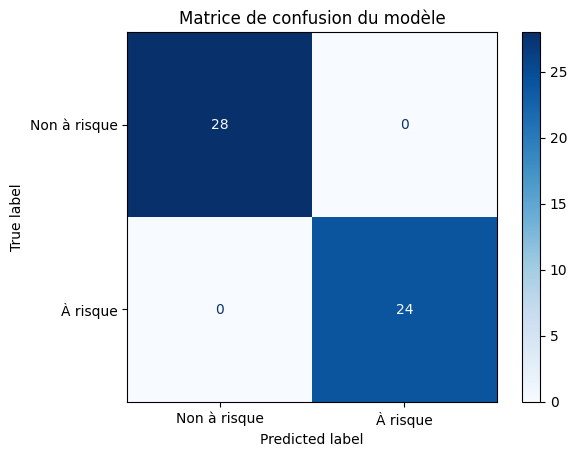

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_true = []
y_pred = []
total = 0

for _, row in test_data.iterrows():
    evidence = row.drop('Risque_cardiaque').to_dict()
    try:
        result = inference.query(variables=['Risque_cardiaque'], evidence=evidence)
        predicted = int(result.values.argmax())
        actual = row['Risque_cardiaque']

        y_true.append(actual)
        y_pred.append(predicted)
        total += 1
    except:
        continue

cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non à risque", "À risque"])

disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion du modèle")
plt.show()
